In [234]:
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
os.chdir('/Volumes/Macintosh HD/Users/gokceuzun/Desktop/4. SENE/Honors Project/S7098')
os.listdir()

['.DS_Store',
 'brain_states_1_S7098.pkl',
 'TAINI_1047_S7098-D2-2021_07_01-0000.npy',
 'TAINI_1047_S7098-BL-2021_06_28-0000.npy',
 'S7098_saline.pkl',
 'S7098_etx.pkl',
 'filtered_TAINI_1047_S7098-D2-2021_07_01-0000.npy',
 'brain_states_2_S7098.pkl']

In [236]:
# Function to calculate the psd of the channels and return as dataframe
# Estimate power spectral density using Welch’s method and Hanning window. 

def calculate_psd(data):
    
    welch_channel = []
    sampling_rate = 250.4
    nperseg = 1252
    
    for data_array in data:
        f, psd = scipy.signal.welch(data_array, sampling_rate, window = 'hann', nperseg = nperseg) #nperseg?
        # f might be needed for plotting?
        welch_channel.append(psd)
        
    return pd.DataFrame(welch_channel)
        

In [237]:
filtered_data = np.load('filtered_TAINI_1047_S7098-D2-2021_07_01-0000.npy') # already sliced btw
br_1_7098 = pd.read_pickle('brain_states_1_S7098.pkl')

## Plot wake psd

In [238]:
wake = br_1_7098.loc[br_1_7098.brainstate == 0]
wake

,brainstate,start_epoch,end_epoch
0,0,0,5
1,0,5,10
2,0,10,15
3,0,15,20
4,0,20,25
...,...,...,...
17242,0,86210,86215
17243,0,86215,86220
17244,0,86220,86225
17256,0,86280,86285


In [239]:
wake_time_start = int(wake.start_epoch[0] * 250.4)
wake_time_end = int(wake.end_epoch[4] * 250.4)
w = filtered_data[:, wake_time_start:wake_time_end] # Taking 5 consecutive wake epochs

<span style="color:blue">*Be careful, not all epochs are consecutive representations! Different sleep stages might interrupt!* </span> 

In [240]:
wake_psd = calculate_psd(w).T

In [241]:
wake_psd.set_axis(['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16'], axis="columns", inplace=True)

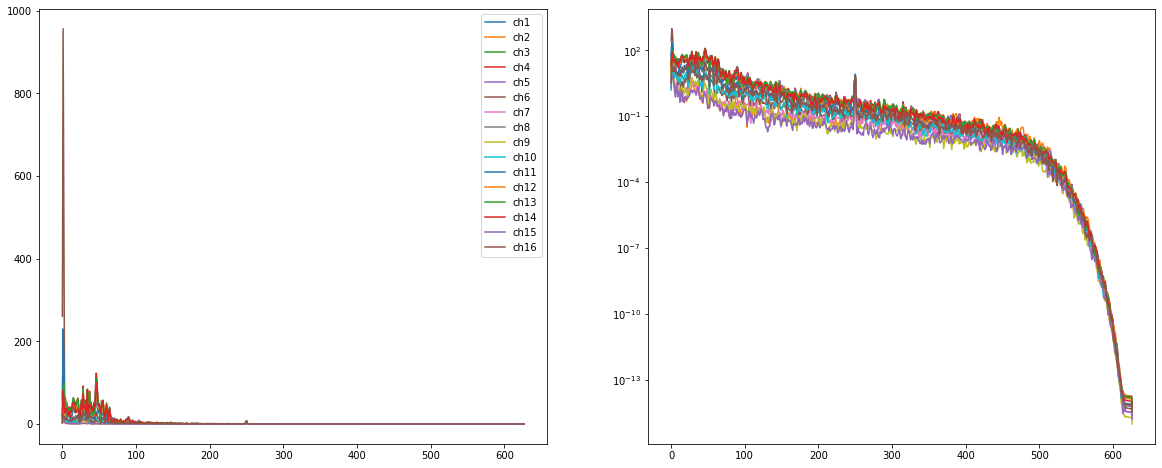

In [242]:
#wake_df.plot(subplots=True, figsize=(20, 20), layout=(4, 4))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
wake_psd.plot(ax=ax1)
plt.semilogy(wake_psd) # plotting with log scale on the y axis
plt.show()

## Plot nonrem psd

In [243]:
nonrem = br_1_7098.loc[br_1_7098.brainstate == 1]
nonrem

,brainstate,start_epoch,end_epoch
5,1,25,30
6,1,30,35
7,1,35,40
8,1,40,45
9,1,45,50
...,...,...,...
17274,1,86370,86375
17275,1,86375,86380
17276,1,86380,86385
17277,1,86385,86390


In [244]:
nonrem_time_start = int(nonrem.start_epoch[5] * 250.4)
nonrem_time_end = int(nonrem.end_epoch[9] * 250.4)
nr = filtered_data[:, nonrem_time_start:nonrem_time_end] # # Taking 5 consecutive non-rem epochs

In [245]:
nr_psd = calculate_psd(nr).T

In [246]:
nr_psd.set_axis(['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16'], axis="columns", inplace=True)

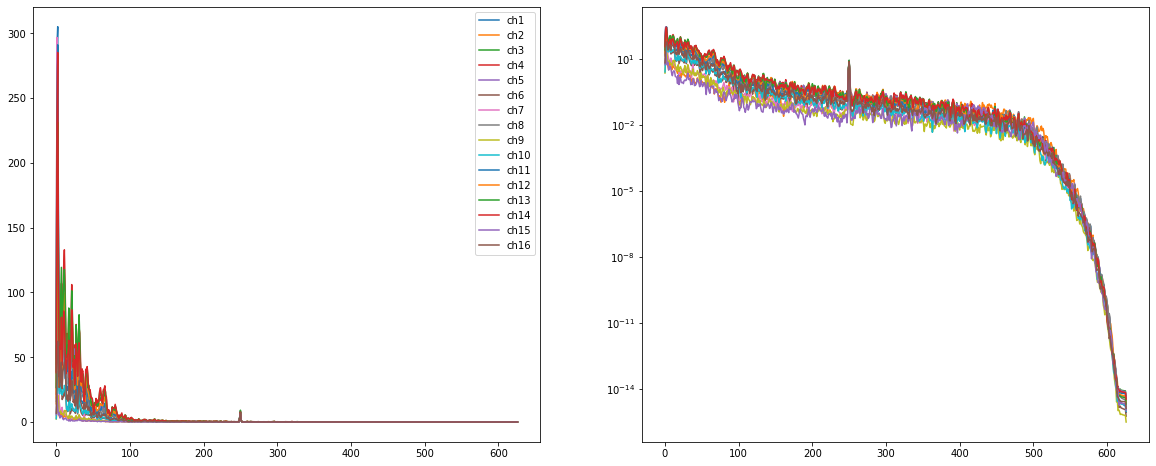

In [247]:
#nr_df.plot(subplots=True, figsize=(20, 20), layout=(4, 4))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
nr_psd.plot(ax=ax1)
plt.semilogy(nr_psd)
plt.show()

## Plot rem psd

In [248]:
rem = br_1_7098.loc[br_1_7098.brainstate == 2]
rem

,brainstate,start_epoch,end_epoch
361,2,1805,1810
362,2,1810,1815
363,2,1815,1820
364,2,1820,1825
365,2,1825,1830
...,...,...,...
14392,2,71960,71965
14393,2,71965,71970
14448,2,72240,72245
14449,2,72245,72250


In [249]:
rem_time_start = int(rem.start_epoch[361] * 250.4)
rem_time_end = int(rem.end_epoch[365] * 250.4)
r = filtered_data[:, rem_time_start:rem_time_end] # Taking 5 consecutive rem epochs

In [250]:
r_psd = calculate_psd(r).T

In [251]:
r_psd.set_axis(['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16'], axis="columns", inplace=True)

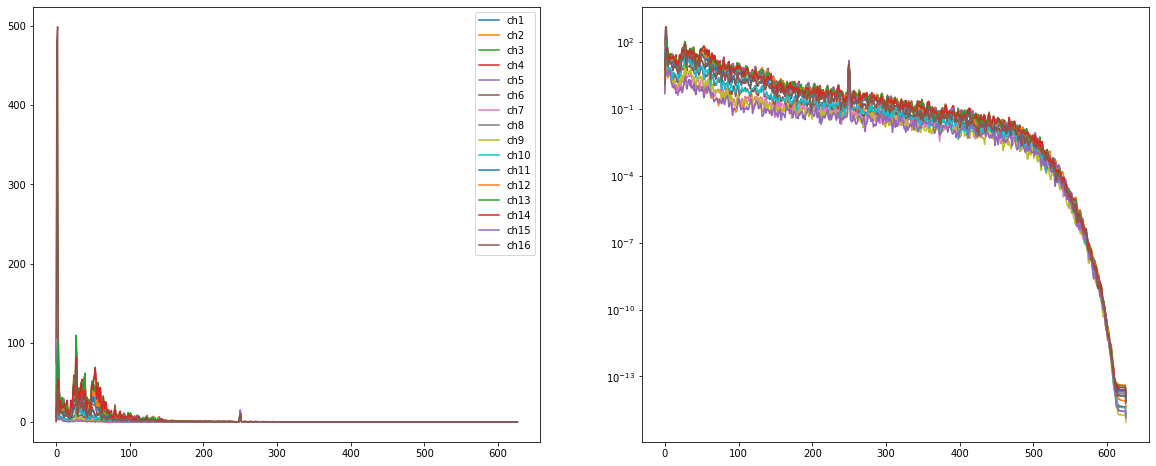

In [252]:
#rem_df.plot(subplots=True, figsize=(20, 20), layout=(4, 4))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
r_psd.plot(ax=ax1)
plt.semilogy(r_psd)
plt.show()

## Correlation matrix  
    FEATURE SELECTION   
Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

 - ch1 : S1Tr_RIGHT (eeg)     
 - ch2 : EMG_RIGHT (emg)     
ch3 : M2_FrA_RIGHT (eeg)  
ch4 : M2_ant_RIGHT (eeg)  
ch5 : M1_ant_RIGHT (eeg)  
ch6 : V2ML_RIGHT (eeg)    
ch7 : V1M_RIGHT (eeg)    
ch8 : S1HL_S1FL_RIGHT (eeg)  
ch9 : V1M_LEFT (eeg)  
ch10 : V2ML_LEFT (eeg)  
ch11 : S1HL_S1FL_LEFT (eeg)  
ch12 : M1_ant_LEFT (eeg)  
ch13 : M2_ant_LEFT (eeg)       
 - ch14 : M2_FrA_LEFT (eeg)  
ch15: EMG_LEFT (emg)  
ch16: S1Tr_LEFT (eeg)  
 - One EEG channel and one EMG channel (e.g channel 2 and channel 1 or 14) - Melissa

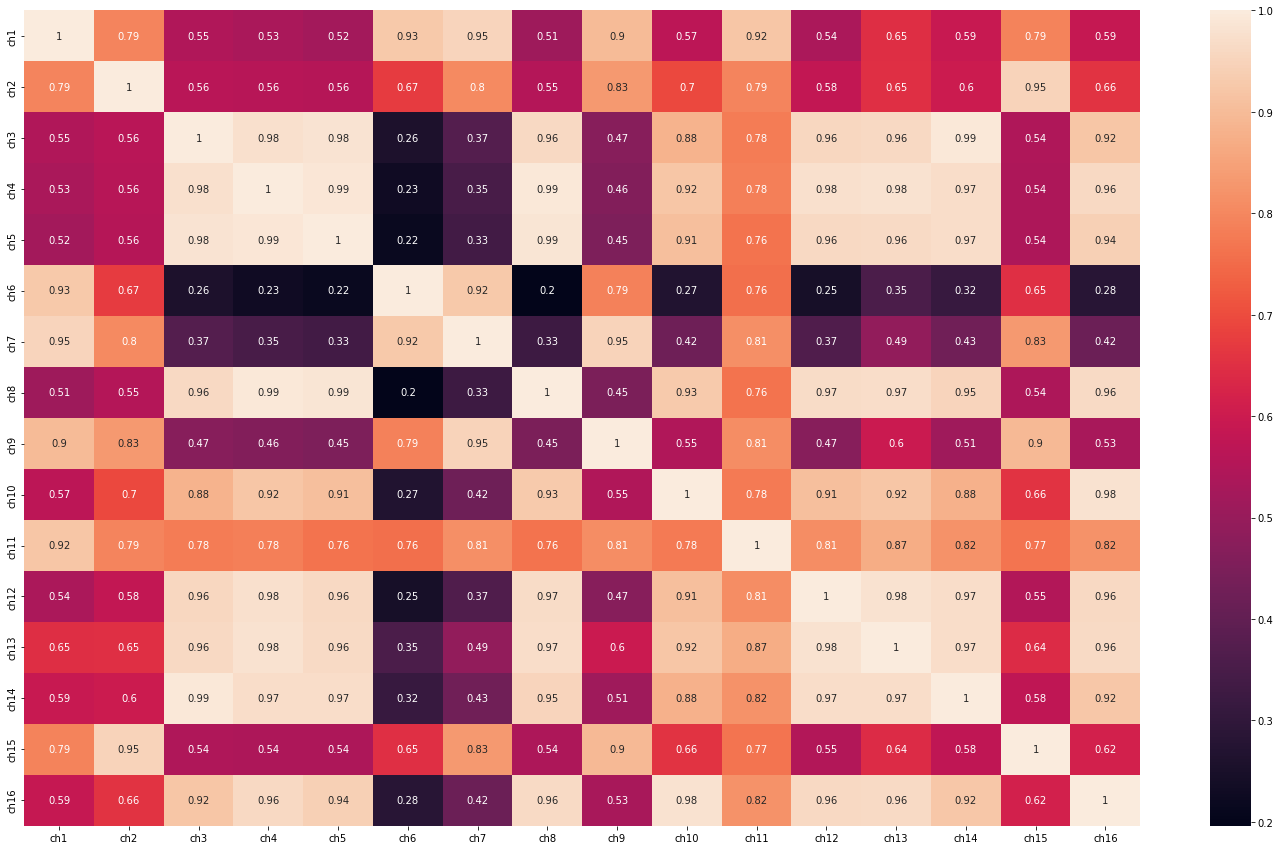

In [253]:
# Wake
f = plt.figure(figsize=(25, 15))
w_corrMatrix = wake_psd.corr()
sns.heatmap(w_corrMatrix, annot=True)
plt.show()

In [254]:
w_corr = w_corrMatrix.unstack()
sorted_corr = w_corr.sort_values(kind="quicksort")
sorted_corr

ch6   ch8     0.196136
ch8   ch6     0.196136
ch5   ch6     0.215705
ch6   ch5     0.215705
ch4   ch6     0.228211
                ...   
      ch4     1.000000
ch3   ch3     1.000000
ch2   ch2     1.000000
ch15  ch15    1.000000
ch16  ch16    1.000000
Length: 256, dtype: float64

In [255]:
#Can choose channel 2 and 8 || channel 15 and 5 for wake. 

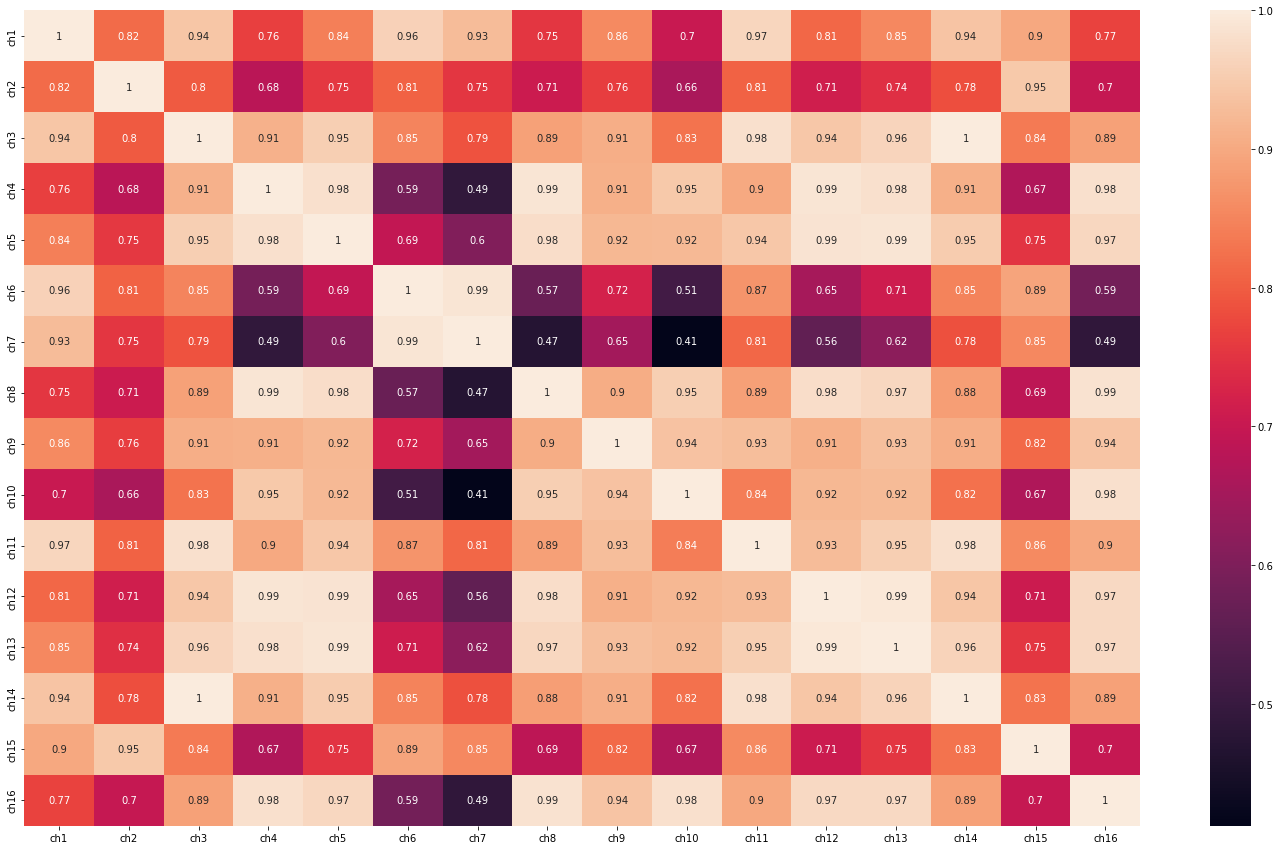

In [256]:
# Non-rem
f = plt.figure(figsize=(25, 15))
nr_corrMatrix = nr_psd.corr()
sns.heatmap(nr_corrMatrix, annot=True)
plt.show()

In [257]:
nr_corr = nr_corrMatrix.unstack()
sorted_corr = nr_corr.sort_values(kind="quicksort")
sorted_corr

ch7   ch10    0.412088
ch10  ch7     0.412088
ch7   ch8     0.469534
ch8   ch7     0.469534
ch7   ch16    0.487085
                ...   
ch4   ch4     1.000000
ch3   ch3     1.000000
ch2   ch2     1.000000
ch15  ch15    1.000000
ch16  ch16    1.000000
Length: 256, dtype: float64

In [258]:
# Can choose channel 2 and 10 || channel 15 and 10 for non-rem. 

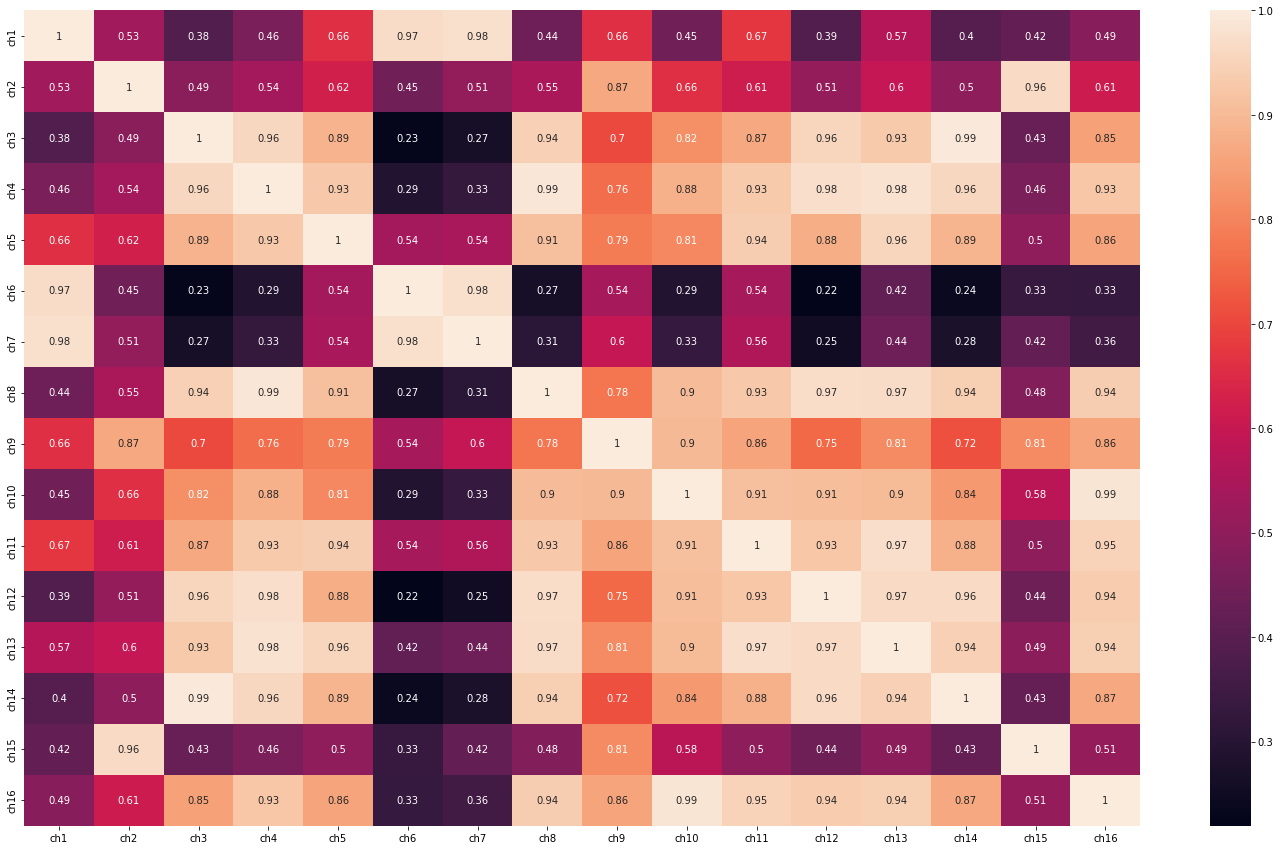

In [259]:
# Rem
f = plt.figure(figsize=(25, 15))
r_corrMatrix = r_psd.corr()
sns.heatmap(r_corrMatrix, annot=True)
plt.show()

In [260]:
r_corr = r_corrMatrix.unstack()
sorted_corr = r_corr.sort_values(kind="quicksort")
sorted_corr

ch12  ch6     0.219331
ch6   ch12    0.219331
ch3   ch6     0.227897
ch6   ch3     0.227897
ch14  ch6     0.240359
                ...   
ch4   ch4     1.000000
ch3   ch3     1.000000
ch2   ch2     1.000000
ch15  ch15    1.000000
ch16  ch16    1.000000
Length: 256, dtype: float64

In [261]:
#Can choose channel 2 and 6 || channel 15 and 6 for rem. 

<span style="color:blue">*Correlation matrix of the entire recording* </span> 

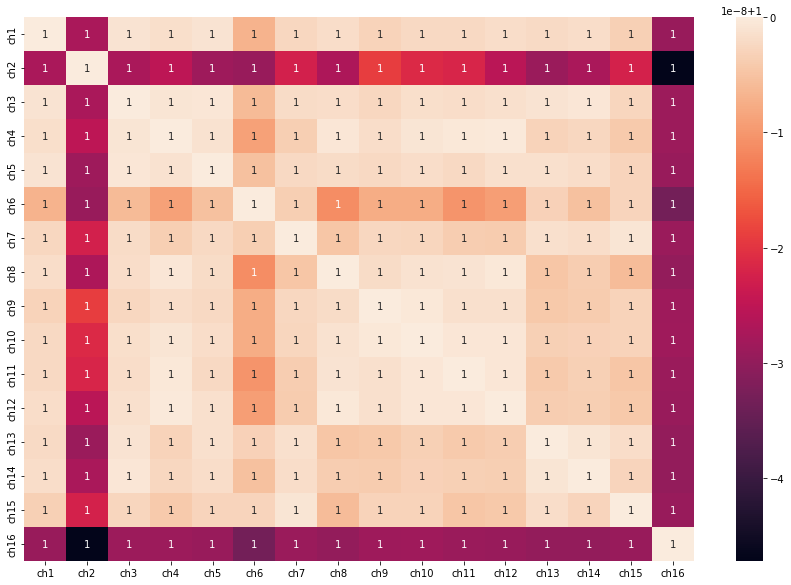

In [271]:
f_psd = calculate_psd(filtered_data).T
f_psd.set_axis(['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16'], axis="columns", inplace=True)
f = plt.figure(figsize=(15, 10))
f_corrMatrix = f_psd.corr()
sns.heatmap(f_corrMatrix, annot=True)
plt.show()